# Modèle Linéaire : Classification

### Importation de la lib :

In [2]:
from interoperability.python_interlop.wrapper import MyModel
import numpy as np

## Linear simple :

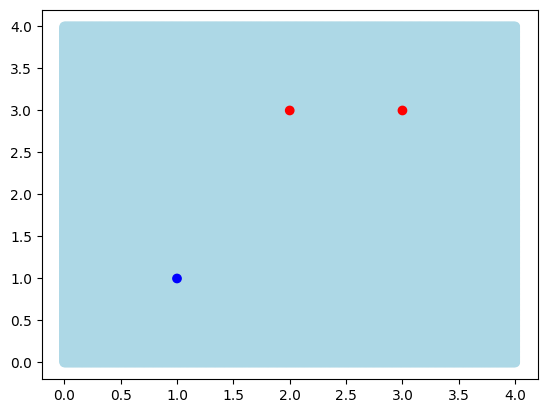

In [3]:
X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([
    1,
    -1,
    -1
])

model = MyModel("ml", 2)

model.train(X, Y, 0.1, 10_000)

model.print_classif(4, 4, 0.01)

# Linear Multiple :

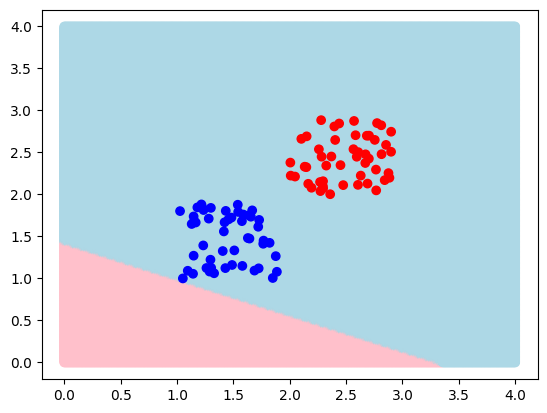

In [5]:
X = np.concatenate(
    [np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50, 2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

model = MyModel("ml", 2)

model.train(X, Y, 0.01, 1_000_000)

model.print_classif(4, 4, 0.01)

# XOR :

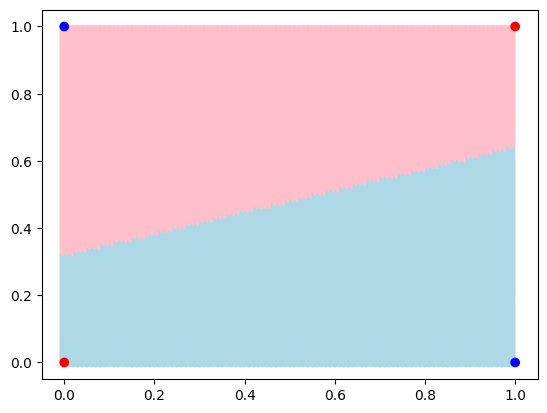

In [6]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

model = MyModel("ml", 2)

model.train(X, Y, 0.1, 1_000)

model.print_classif(1, 1, 0.01)

# Cross

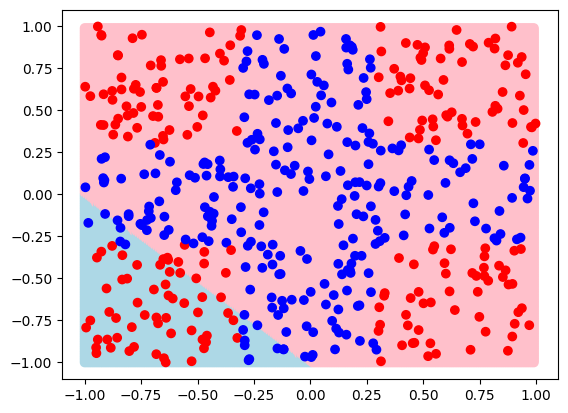

In [7]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

model = MyModel("ml", 2)

model.train(X, Y, 0.1, 1_000)

model.print_classif(1, 1, 0.01, -1, -1)

# Multi linear 3 classes

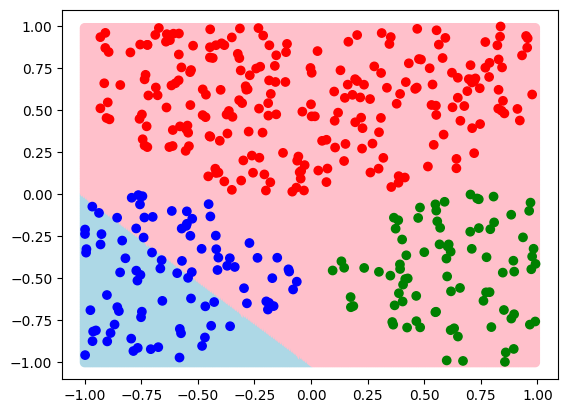

In [8]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0 else
              [0, 0, 0] for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

model = MyModel("ml", 2, 3)

model.train(X, Y, 0.001, 1_000_000)

model.print_classif(1, 1, 0.01, -1, -1)

# Multicross :

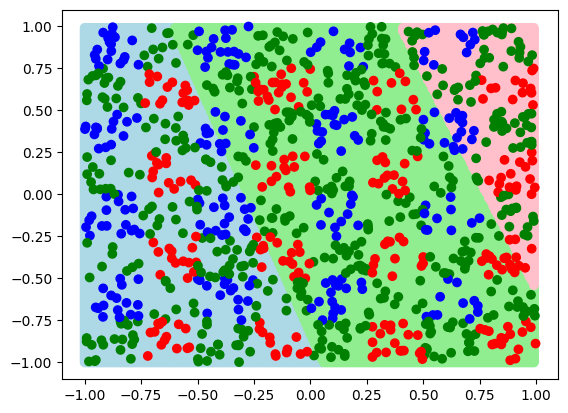

In [10]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5) else [0, 1, 0] if abs(
    p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5) else [0, 0, 1] for p in X])

model = MyModel("ml", 2, 3)

model.train(X, Y, 0.001, 1_000)

model.print_classif(1, 1, 0.01, -1, -1)